<h1><b>Libraries</b></h1>

In [179]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
from time import time
from sklearn.exceptions import ConvergenceWarning
#ignore warnings influence output print
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#ML models
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
from sklearn.neural_network import MLPClassifier
import umap.umap_ as umap

<h1><b>File Path</b></h1>

In [180]:
for dirname, _, filenames in os.walk('/Loan_Prediction_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#path for the training set
tr_path = "./Loan_Prediction_Dataset/train.csv"

<h1><b>Preprocessing and Data Analysis</b></h1>

<h2>Read datasets from files</h2>

In [181]:
# read in csv file as a DataFrame
data = pd.read_csv(tr_path)
# explore the first 5 rows
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [182]:
#the Id column is not needed, let's drop it for both test and train datasets
data.drop('Loan_ID',axis=1,inplace=True)

<h2>Missing values</h2>

In [183]:
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [184]:
data.shape  

(614, 12)

In [185]:
#filling the missing data
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    
    data[col] = data[col].fillna(
    data[col].dropna().mode().values[0] )      
data.isnull().sum().sort_values(ascending=False)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [186]:
data.shape

(614, 12)

<h2>Data visalization</h2>

In [187]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  data[num]
#categoric df
loan_cat = data[cat]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

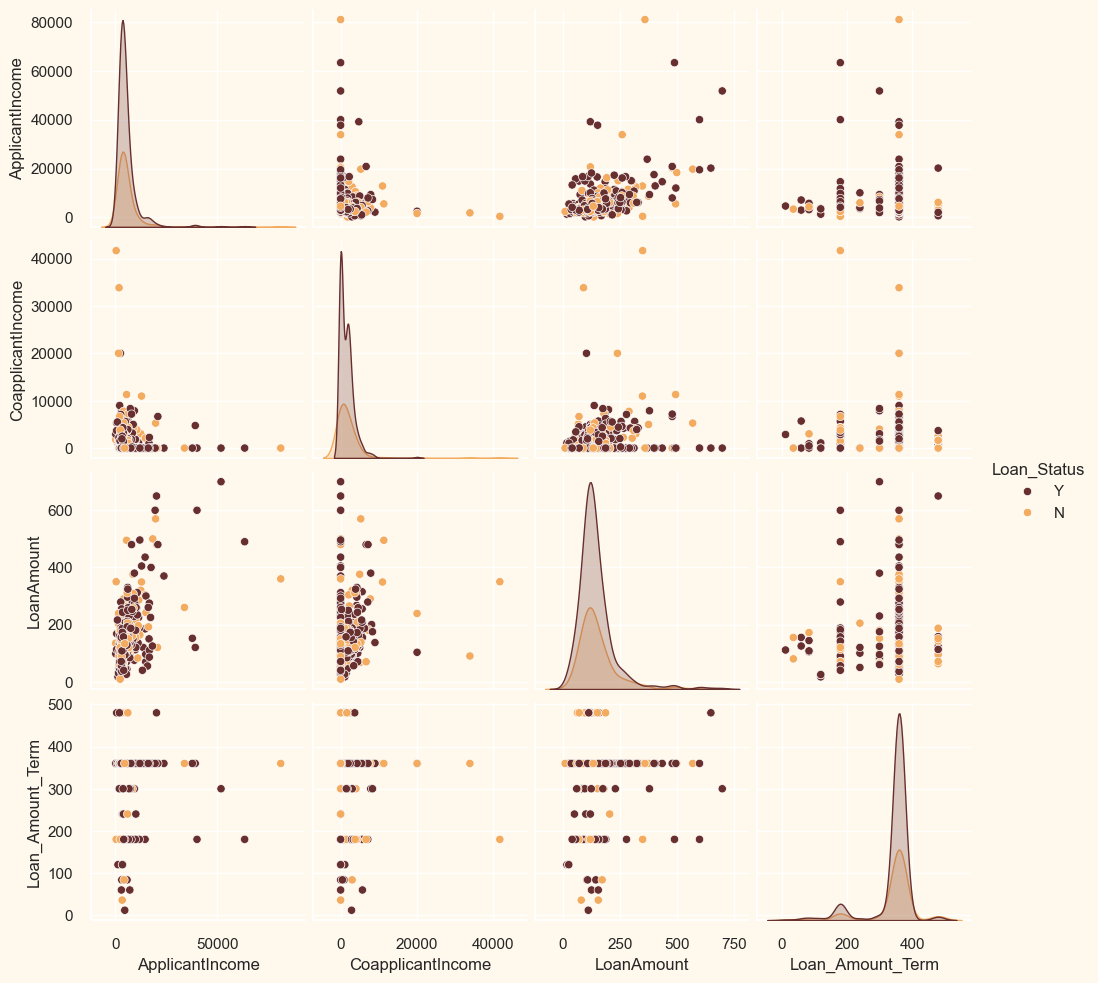

In [188]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Property_Area", "Loan_Amount_Term", "Loan_Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Loan_Status",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [189]:
data = data[(data["ApplicantIncome"]<50000)]
data = data[(data["CoapplicantIncome"]<20000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 607


Loan_Status
Y    419
N    188
Name: count, dtype: int64


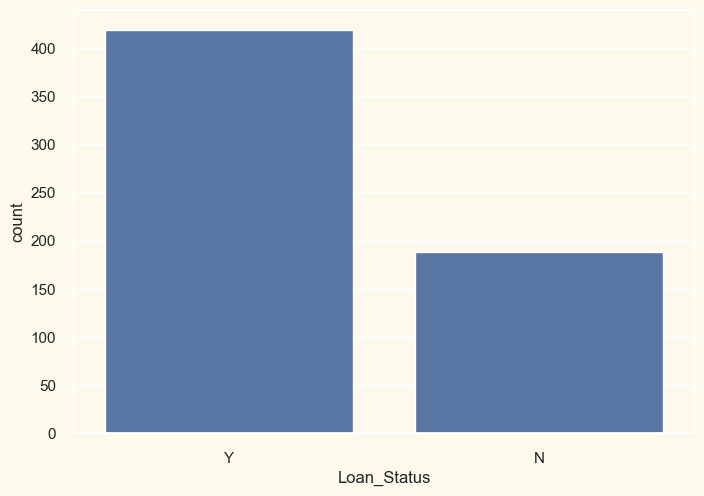

In [190]:
sns.countplot(x ='Loan_Status', data = data)
print(data[cat[-1]].value_counts())

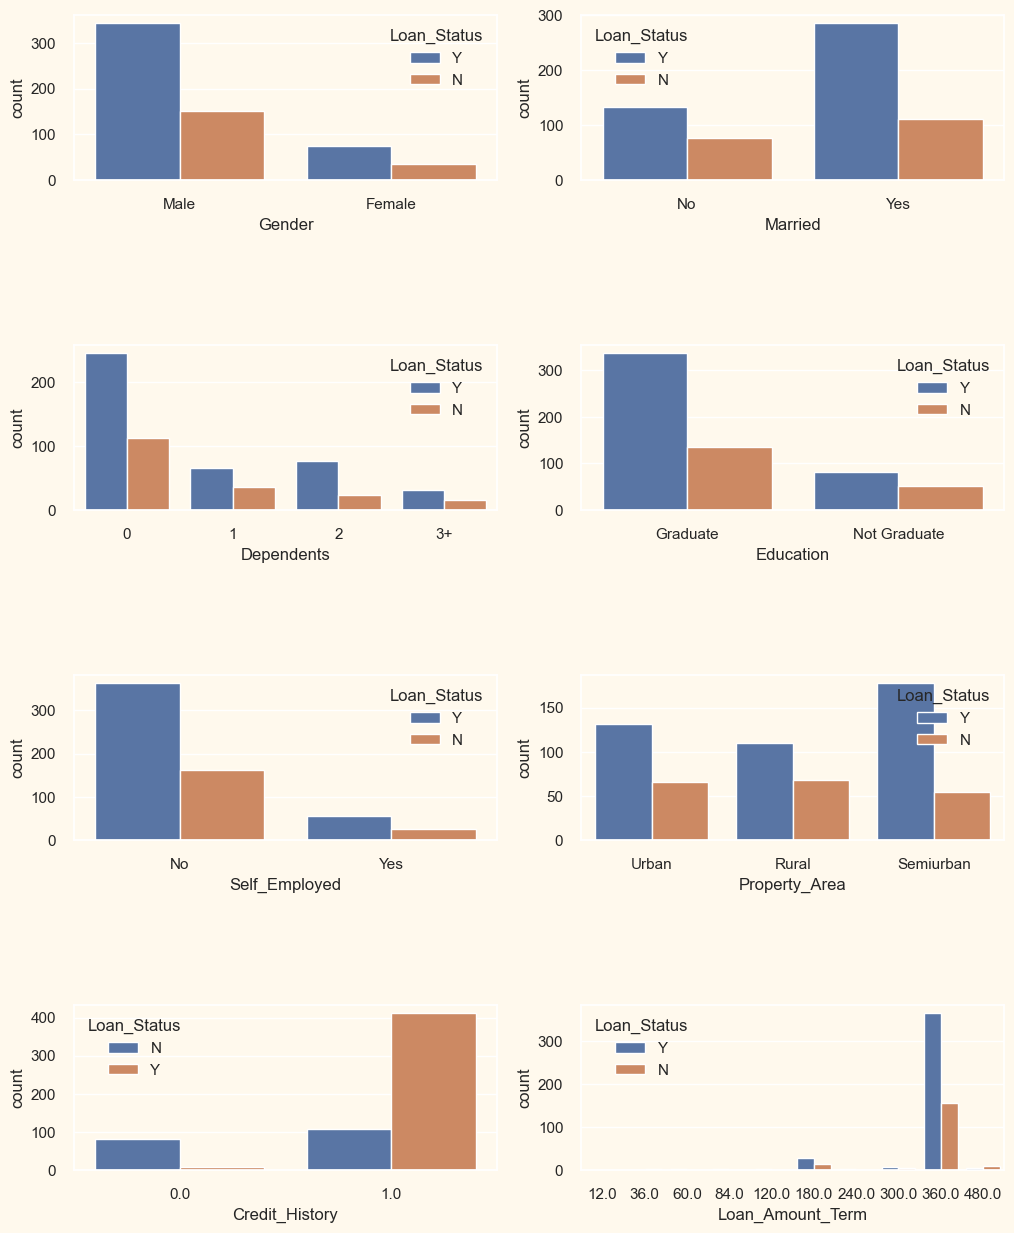

In [191]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)


<h2>Encoding data to numreic</h2>

In [192]:
#converting categorical values to numbers
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

tr_cat = data.copy()

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


<Axes: >

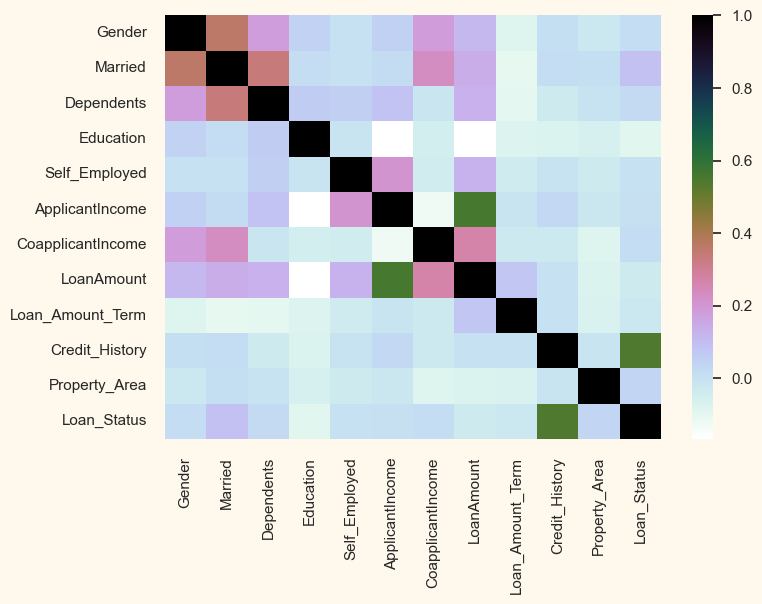

In [193]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='cubehelix_r')

<h1><b>Machine learning models</b></h1>

In [194]:
def divideclusters(n,df_clustered):

    clusters = []
    for i in range(0,n):
        clusters.append(df_clustered[df_clustered['cluster'] == i+0.0])

    sns.countplot(
    data=df_clustered,
    x="cluster", hue="Loan_Status",
    palette="dark", alpha=.6
    )
    return clusters

In [195]:
def plotcluster( cluster ):
    categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    sns.kdeplot(x ='ApplicantIncome', y='LoanAmount', data = cluster, ax = ax[0], kind="hex",color="#4CB391")
    sns.countplot(x ='Loan_Status', ax = ax[1], data = cluster)
    fig,axes = plt.subplots(4,2,figsize=(12,15))
    for idx,cat_col in enumerate(categorical_columns):
        row,col = idx//2,idx%2
        sns.countplot(x=cat_col,data=cluster,ax=axes[row,col])

In [196]:
def plotcluster2( df_clustered ):
    categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
    fig,ax = plt.subplots()
    sns.countplot(data=df_clustered,x="cluster", hue="Loan_Status",palette="dark", alpha=.6)
    for i in range(int(len(ax.patches) /2)):
        p1 = ax.patches[i].get_height()
        p2 = ax.patches[i + int(len(ax.patches) /2)].get_height()
        ax.annotate('%.2f'% (p1 / p2), (ax.patches[i].get_x(), ax.patches[i].get_height()), color='black')

    fig,axes = plt.subplots(4,2,figsize=(12,15))
    for idx,cat_col in enumerate(categorical_columns):
        row,col = idx//2,idx%2
        sns.countplot(
        data=df_clustered,
        x="cluster", hue=cat_col,
        palette="dark", alpha=.6,
        ax=axes[row,col]
        )

In [197]:
def plotIncomeLoanRate(clusters):
    fig,ax = plt.subplots(1,len(clusters),figsize=(len(clusters)*5,5))
    for i in range(0,len(clusters)):
        sns.kdeplot(x ='ApplicantIncome', y='LoanAmount', data = clusters[i], ax = ax[i], kind="hex",color="#4CB391").set(title=('cluster'+ str(i)))

In [198]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_scale = StandardScaler().fit_transform(X)

<h2>Kmeans without do dimension reduction</h2>

Elbow Method to determine the number of clusters to be formed:


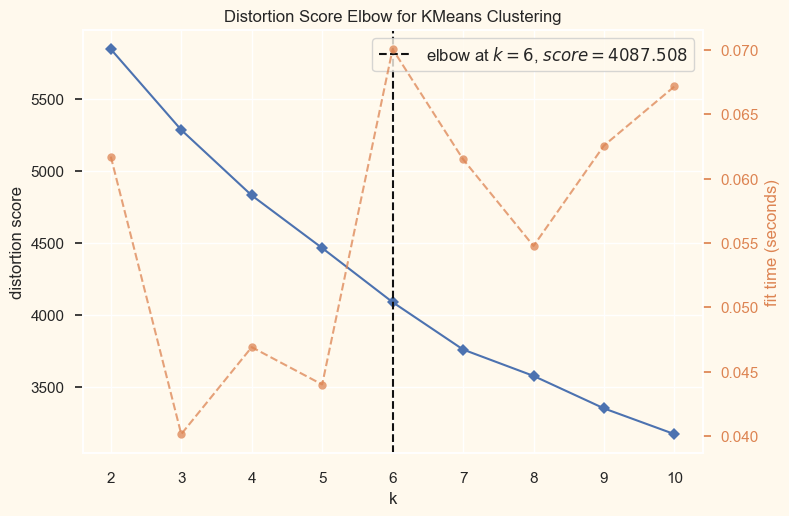

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [199]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_scale)
Elbow_M.show()

In [200]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scale)

KMeans(n_clusters=6)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

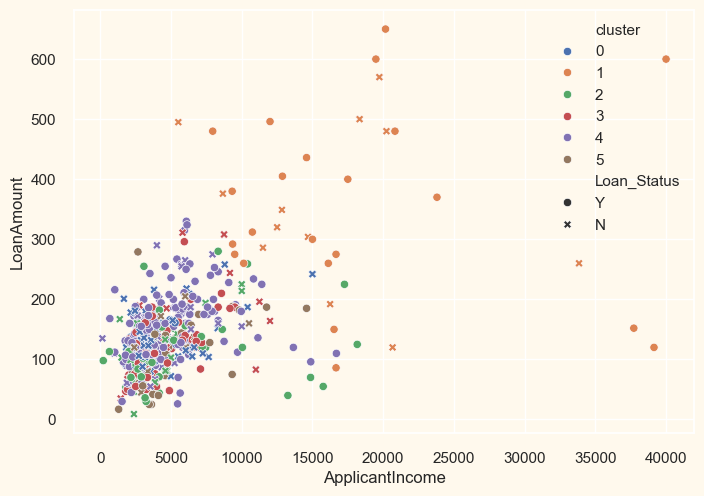

In [201]:
kmeans_clustered_tr0 = tr_cat.copy()
kmeans_clustered_tr0['cluster'] = kmeans.labels_

sns.scatterplot(data=kmeans_clustered_tr0, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

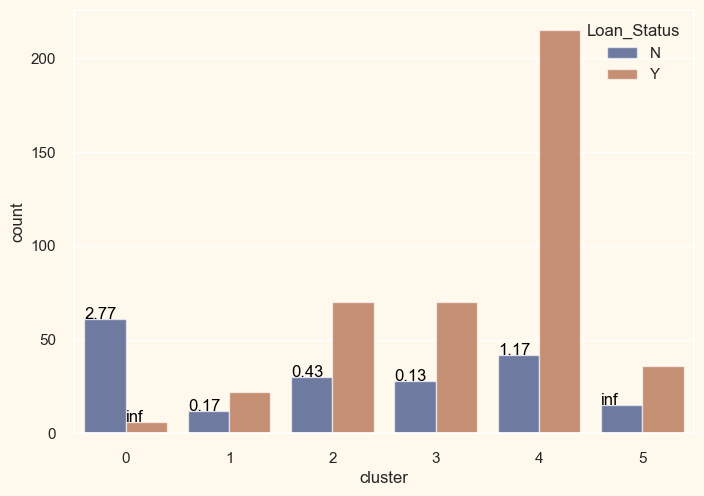

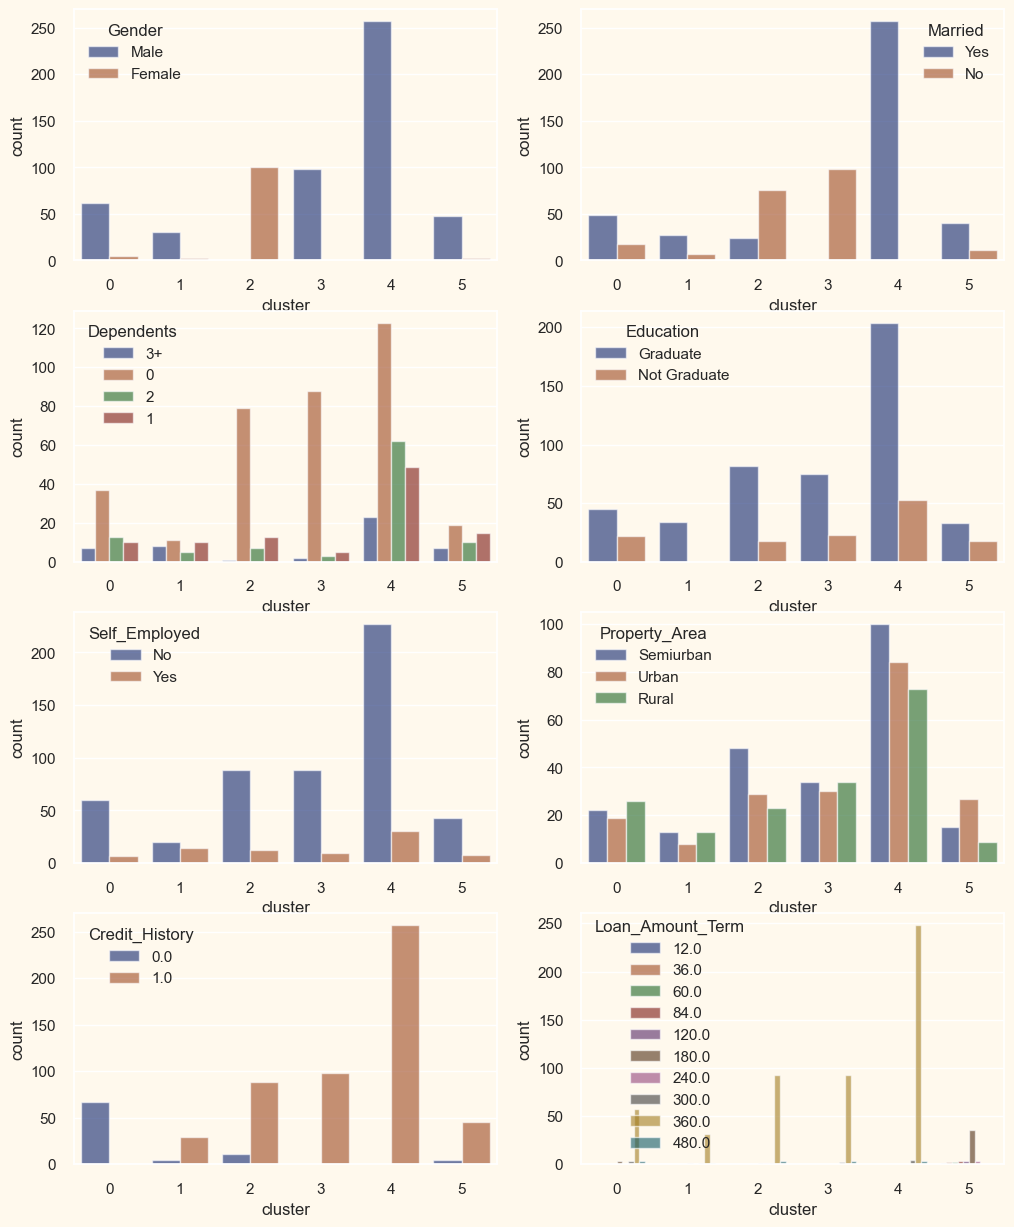

In [202]:
plotcluster2(kmeans_clustered_tr0)

<h2>PCA</h2>

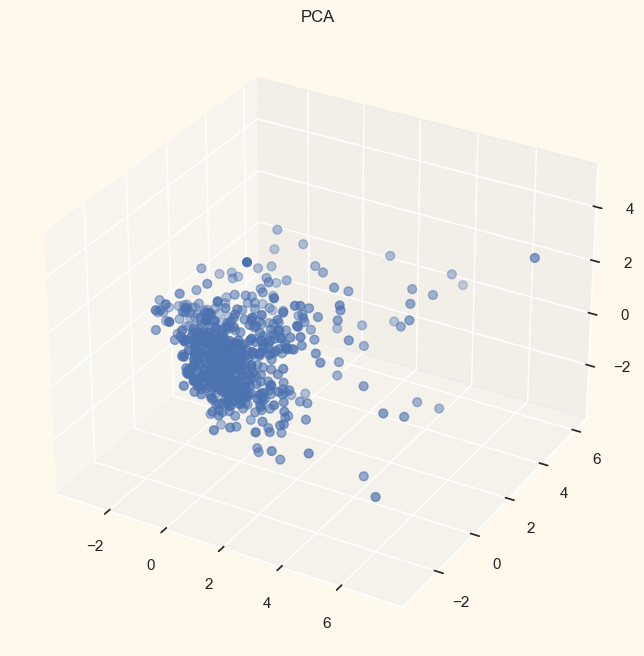

In [203]:
pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca_array = pca.transform(X_scale)
X_pca = pd.DataFrame(X_pca_array, columns=(["col1","col2", "col3"]))
x =X_pca["col1"]
y =X_pca["col2"]
z =X_pca["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("PCA")
plt.show()

<h2>K-means + PCA</h2>

Elbow Method to determine the number of clusters to be formed:


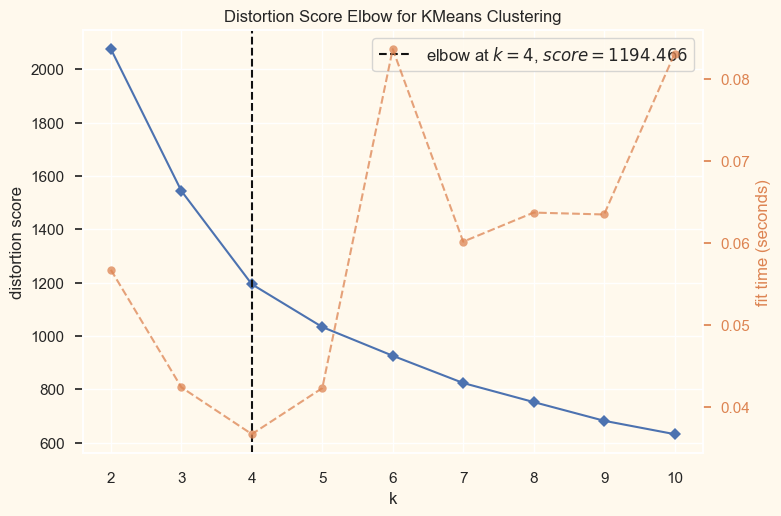

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [204]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

Text(0.5, 0, 'Number of Clusters')

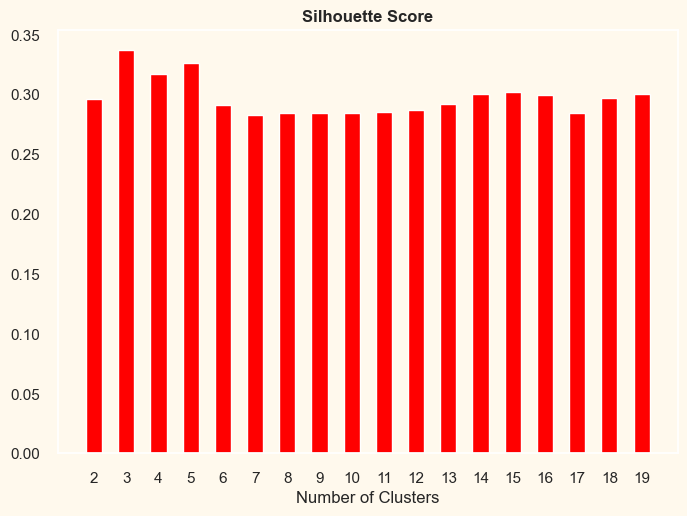

In [205]:
silhouette = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X_pca)
    silhouette[i] = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')

In [206]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

KMeans(n_clusters=4)

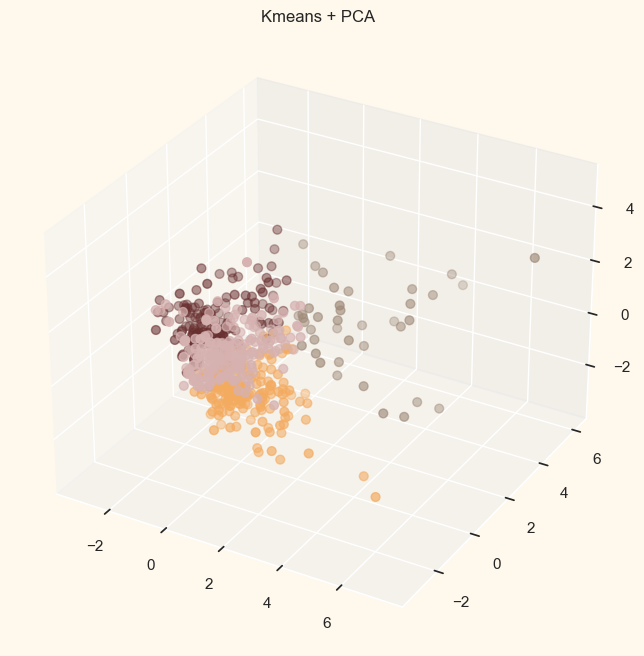

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

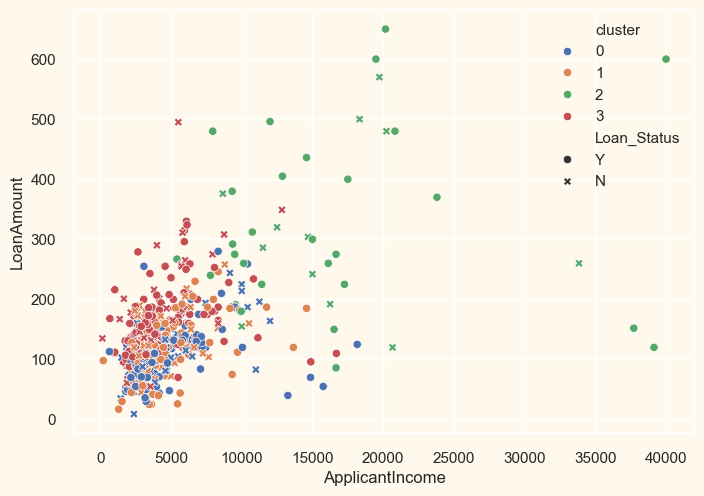

In [207]:
kmeans_result = X_pca.copy()
kmeans_clustered_tr = tr_cat.copy()

kmeans_result['cluster'] = kmeans.labels_
kmeans_clustered_tr['cluster'] = kmeans.labels_

x =kmeans_result["col1"]
y =kmeans_result["col2"]
z =kmeans_result["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans + PCA")
plt.show()


sns.scatterplot(data=kmeans_clustered_tr, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

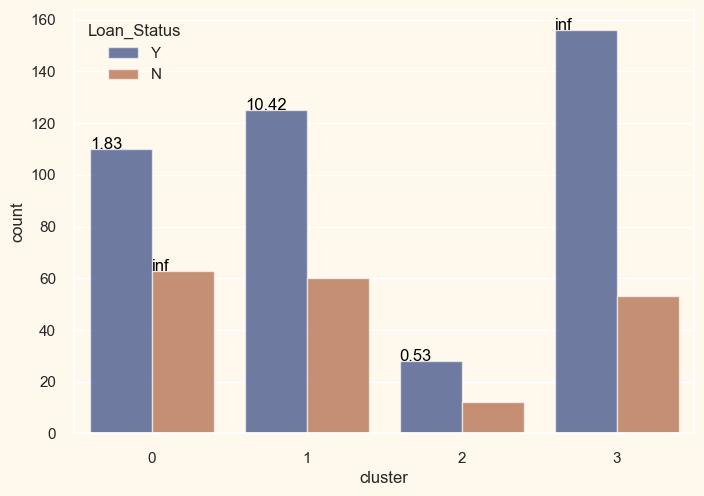

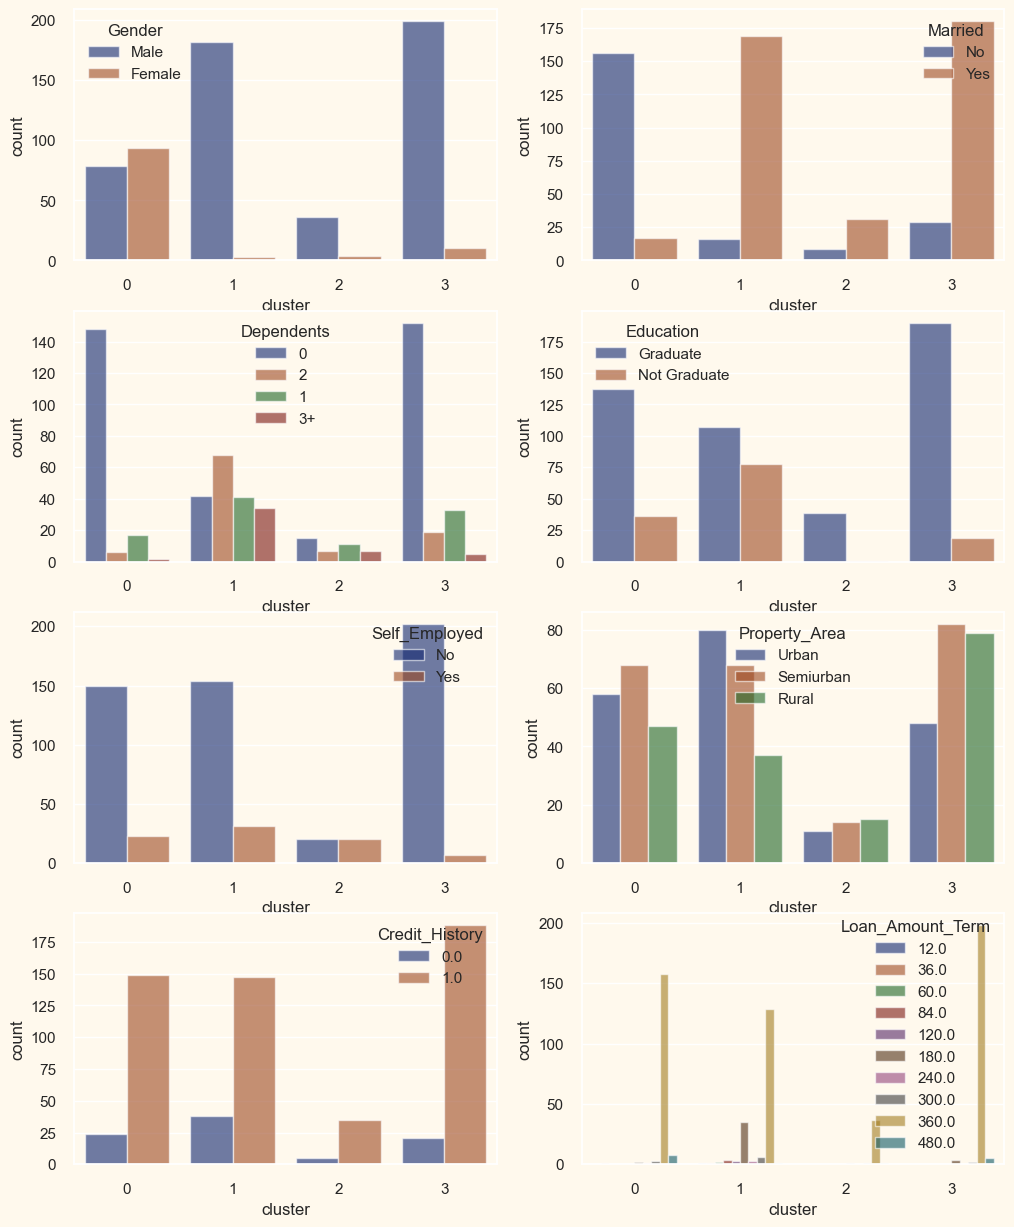

In [208]:
plotcluster2(kmeans_clustered_tr)

<h2>GMM + PCA</h2>

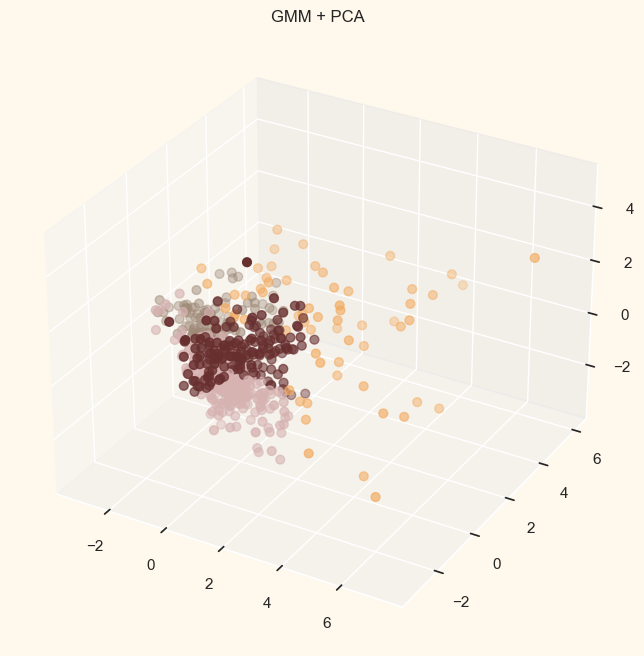

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

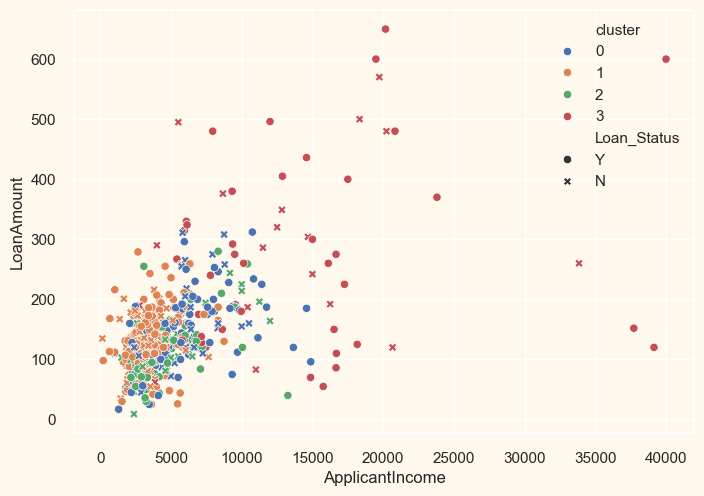

In [209]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_pca)
gmm_cluster = gmm.predict(X_pca)
gmm_result = X_pca.copy()
gmm_clustered_tr = tr_cat.copy()

gmm_result['cluster'] = gmm_cluster
gmm_clustered_tr['cluster'] = gmm_cluster

x =gmm_result["col1"]
y =gmm_result["col2"]
z =gmm_result["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + PCA")
plt.show()

sns.scatterplot(data=gmm_clustered_tr, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

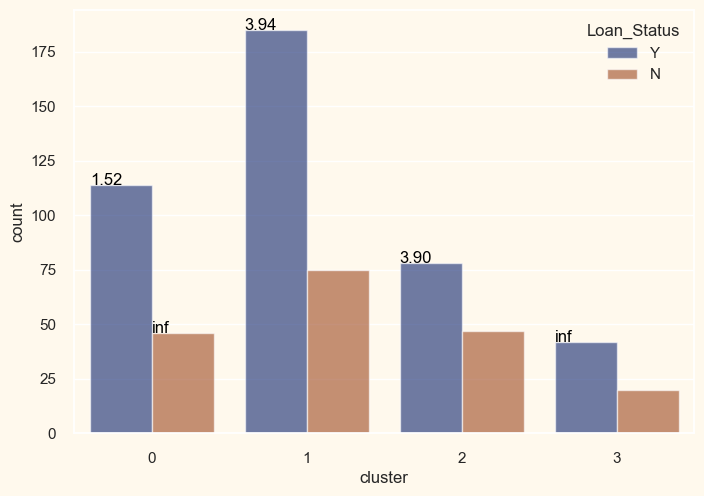

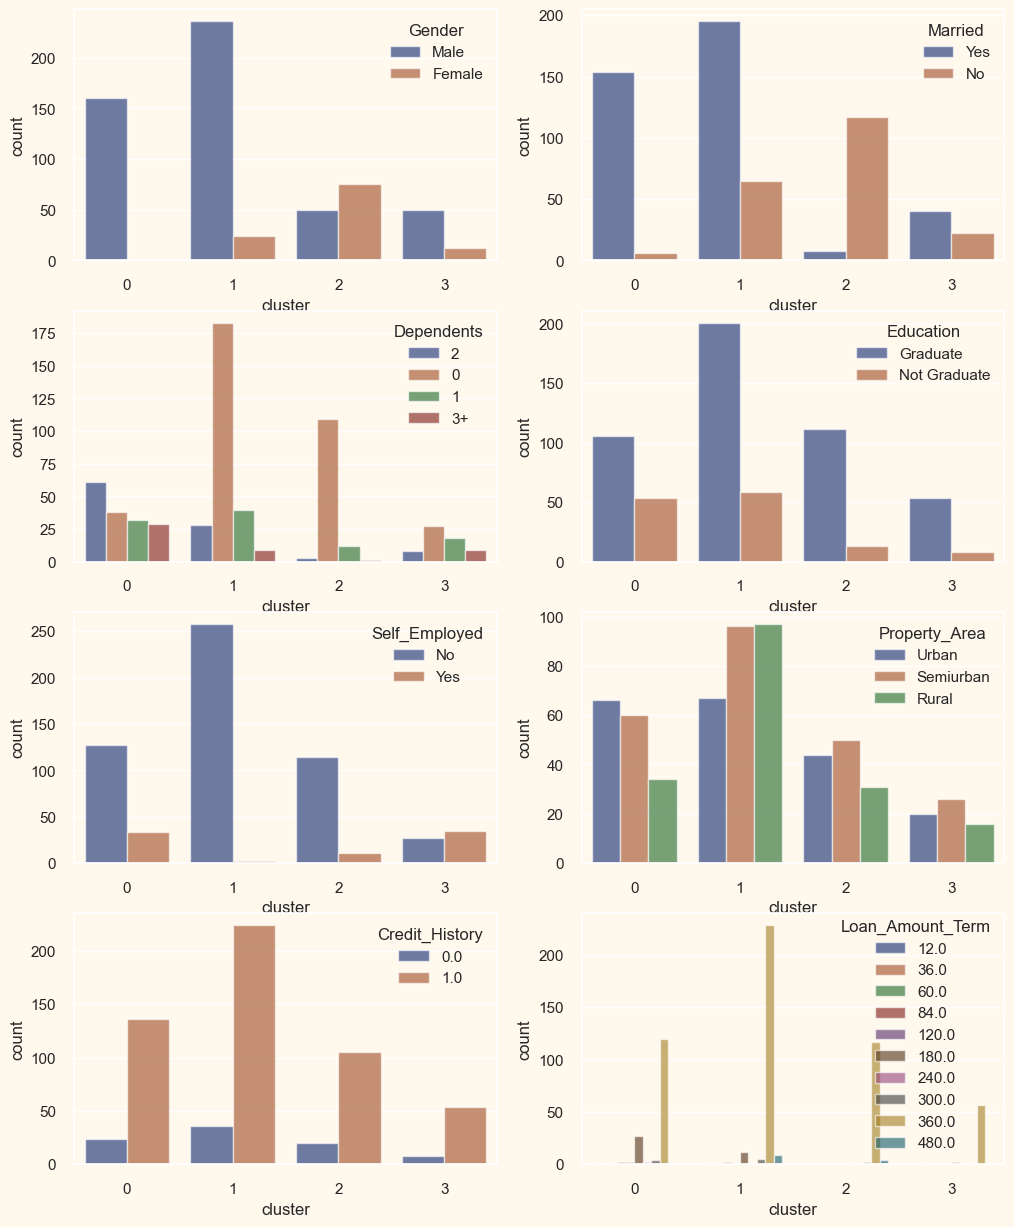

In [210]:
plotcluster2(gmm_clustered_tr)

<h2>UMAP</h2>

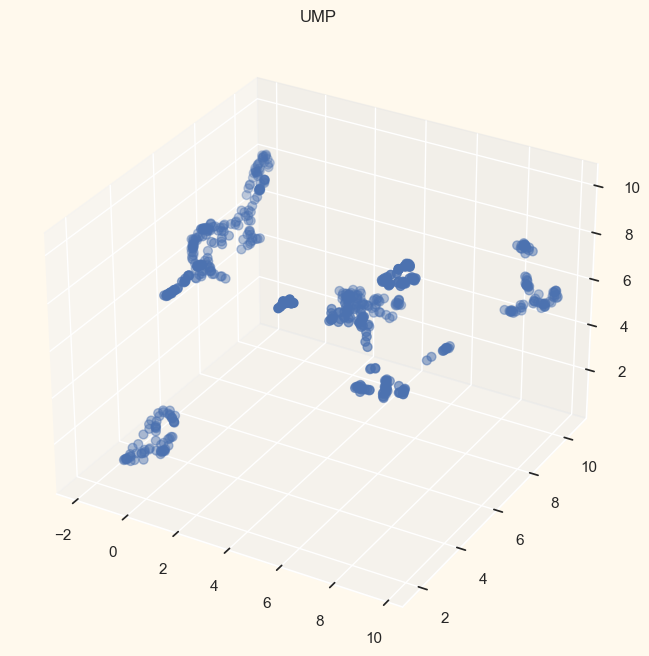

In [211]:
reducer = umap.UMAP(n_components=3)
ump = reducer.fit_transform(X_scale)
X_ump = pd.DataFrame(ump, columns=(["col1","col2","col3"]))
x =X_ump["col1"]
y =X_ump["col2"]
z =X_ump["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap)
ax.set_title("UMP")
plt.show()

<h2>K-means + UMAP</h2>

Elbow Method to determine the number of clusters to be formed:


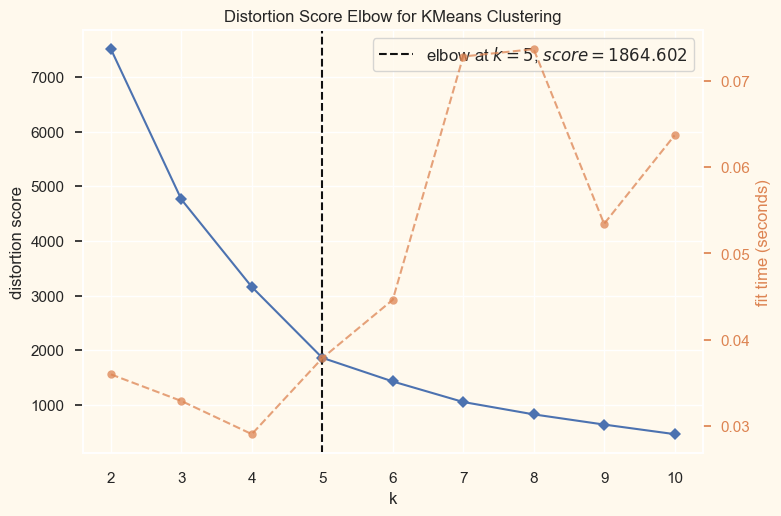

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_ump)
Elbow_M.show()

In [213]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_ump)

KMeans(n_clusters=5)

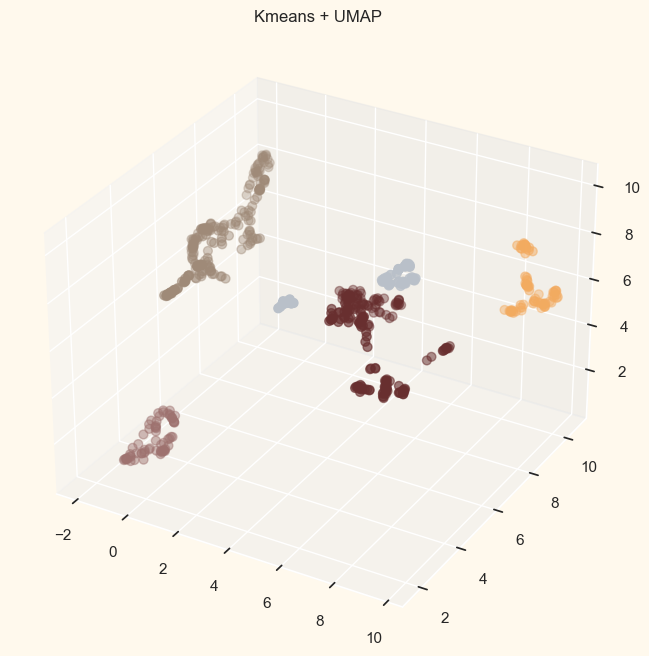

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

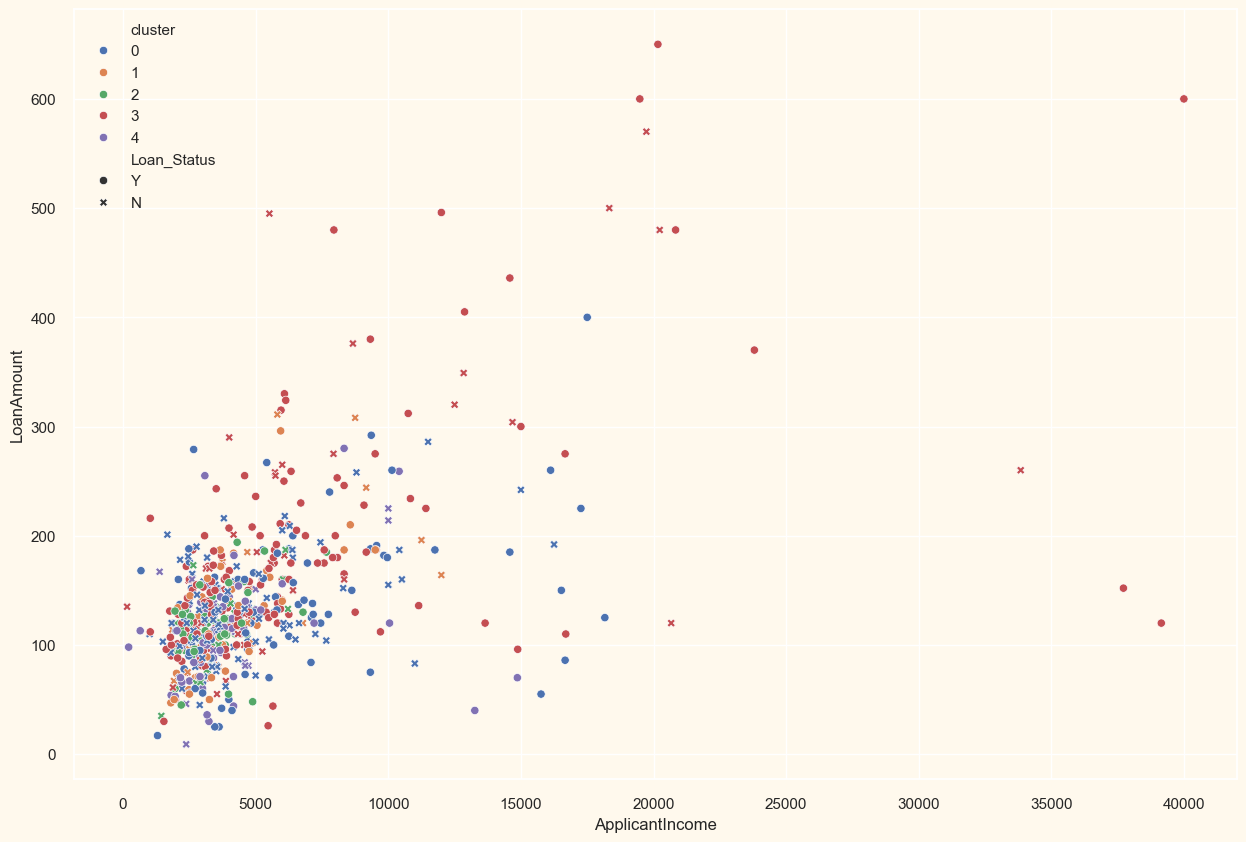

In [214]:
kmeans_result2 = X_ump.copy()
kmeans_clustered_tr2 = tr_cat.copy()

kmeans_result2['cluster'] = kmeans.labels_
kmeans_clustered_tr2['cluster'] = kmeans.labels_

x =kmeans_result2["col1"]
y =kmeans_result2["col2"]
z =kmeans_result2["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result2["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans + UMAP")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=kmeans_clustered_tr2, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

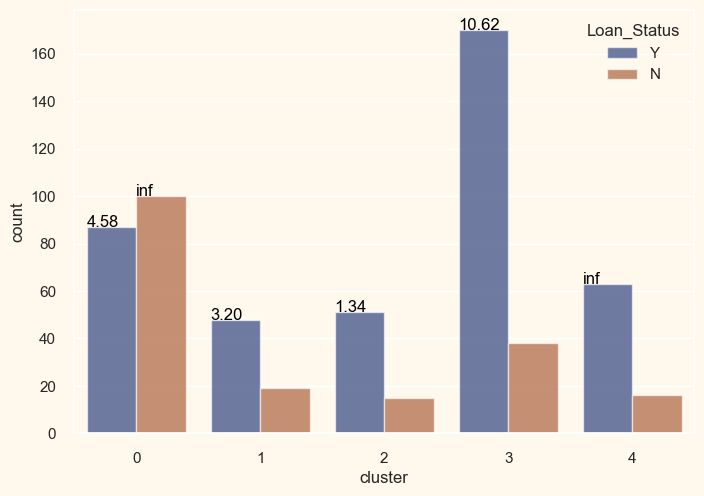

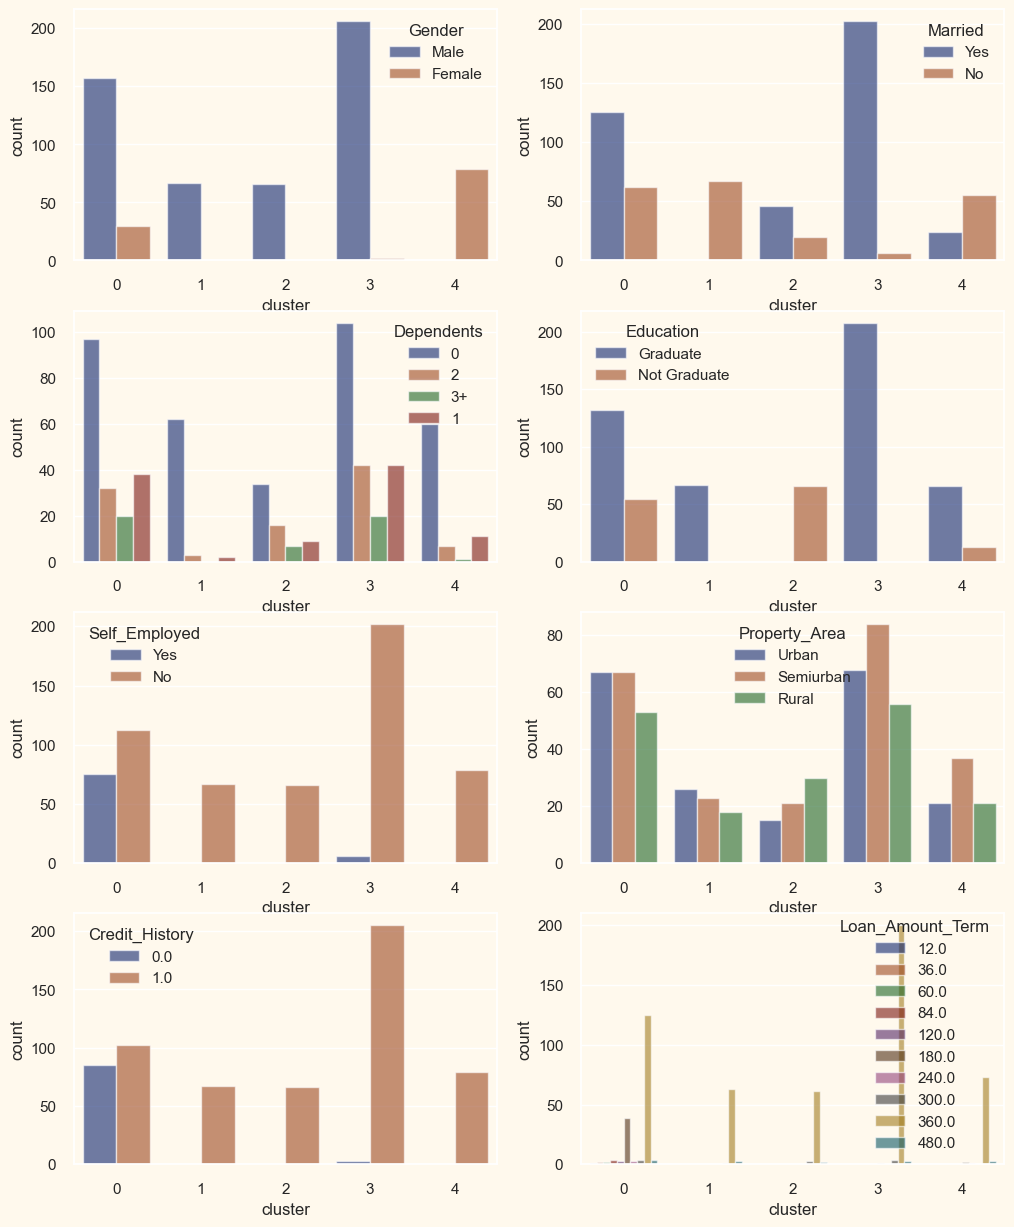

In [215]:
plotcluster2(kmeans_clustered_tr2)

<h2>GMM + UMAP</h2>

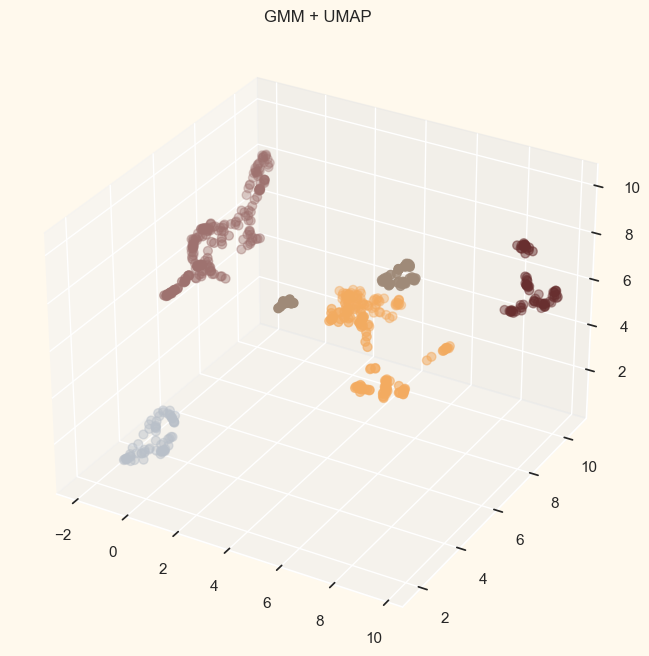

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

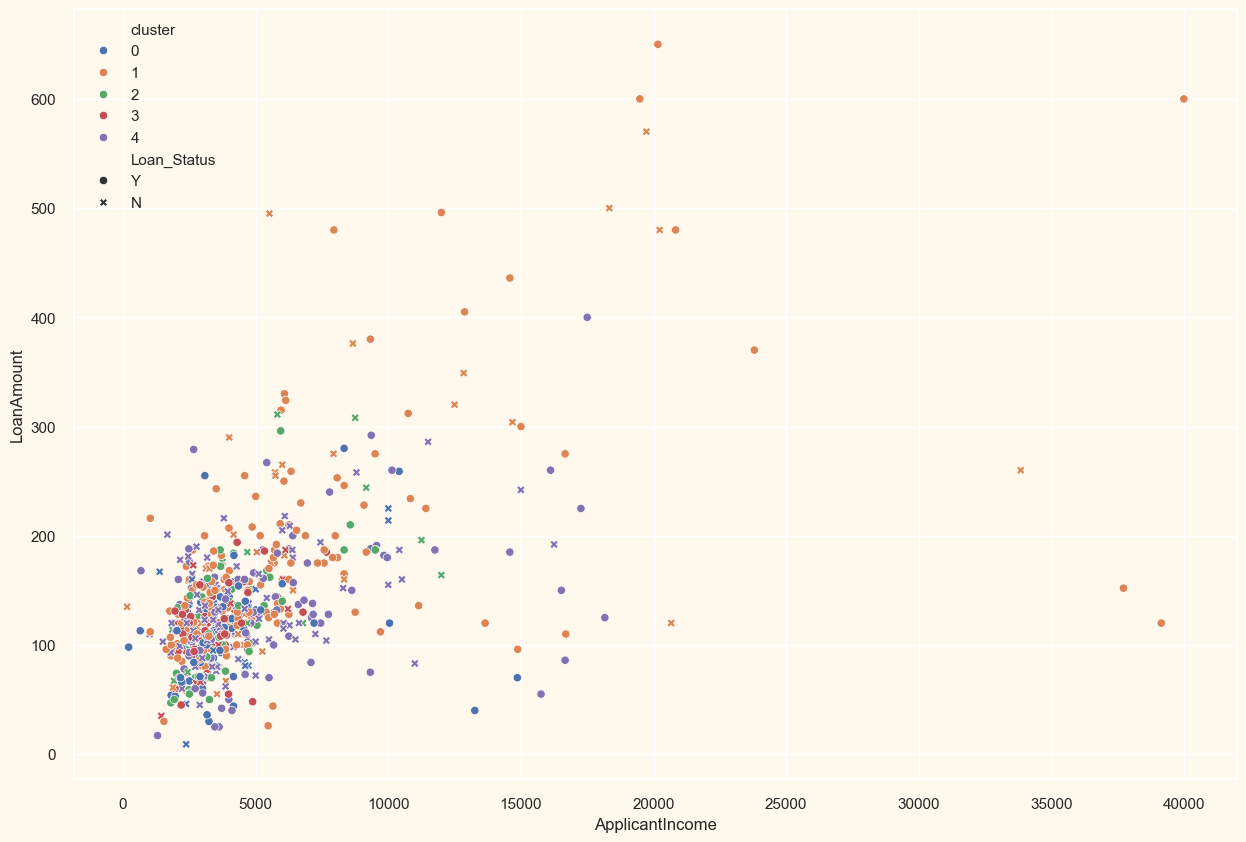

In [216]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_ump)
gmm_cluster = gmm.predict(X_ump)
gmm_result2 = X_ump.copy()
gmm_clustered_tr2 = tr_cat.copy()

gmm_result2['cluster'] = gmm_cluster
gmm_clustered_tr2['cluster'] = gmm_cluster

x =gmm_result2["col1"]
y =gmm_result2["col2"]
z =gmm_result2["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result2["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + UMAP")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=gmm_clustered_tr2, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

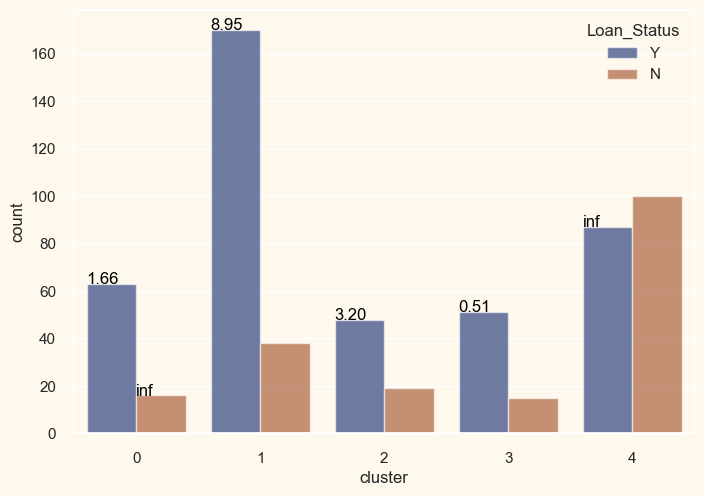

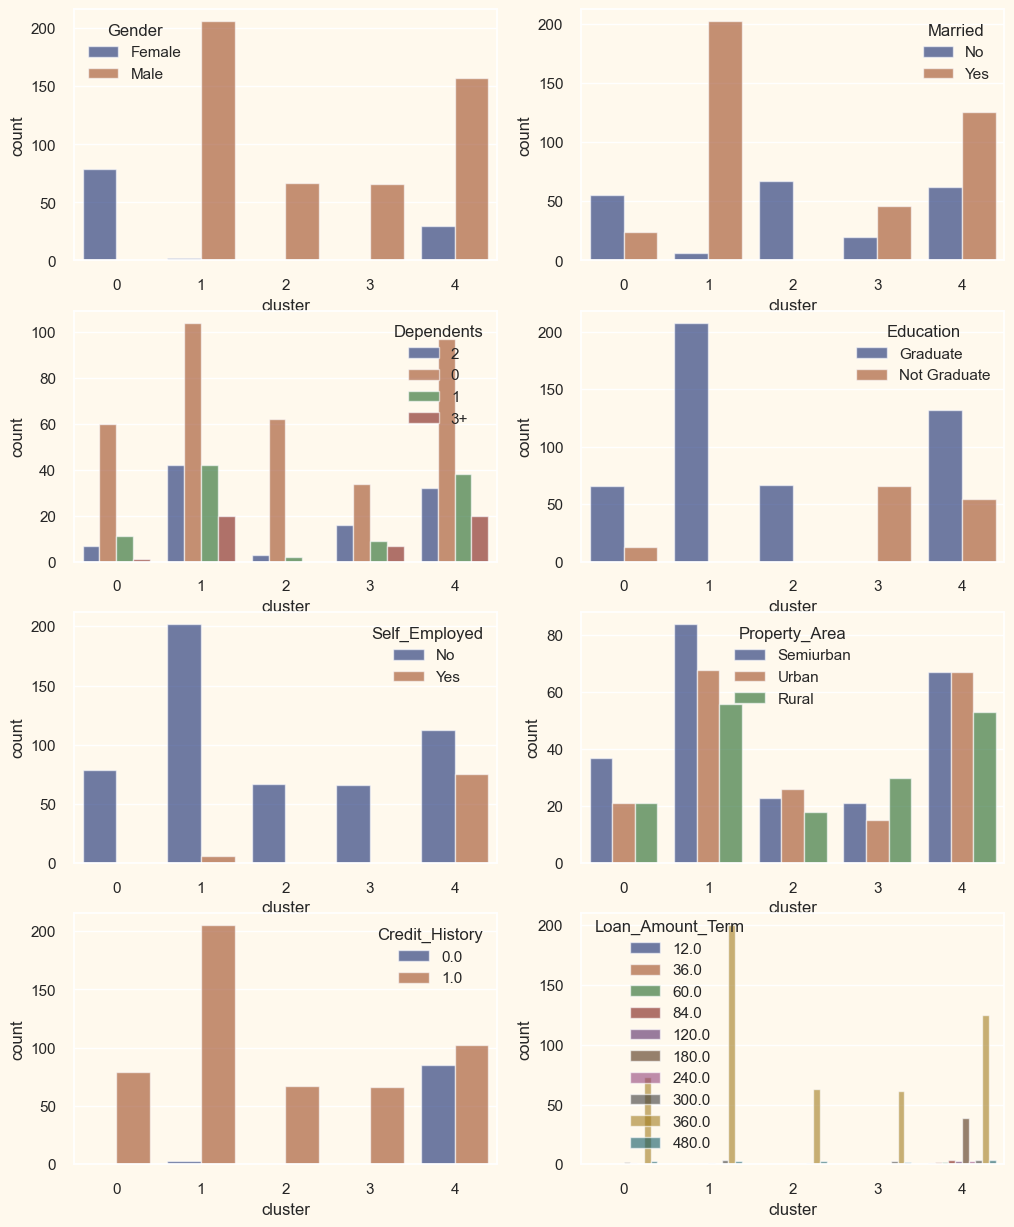

In [217]:
plotcluster2(gmm_clustered_tr2)

<h2>ICA</h2>

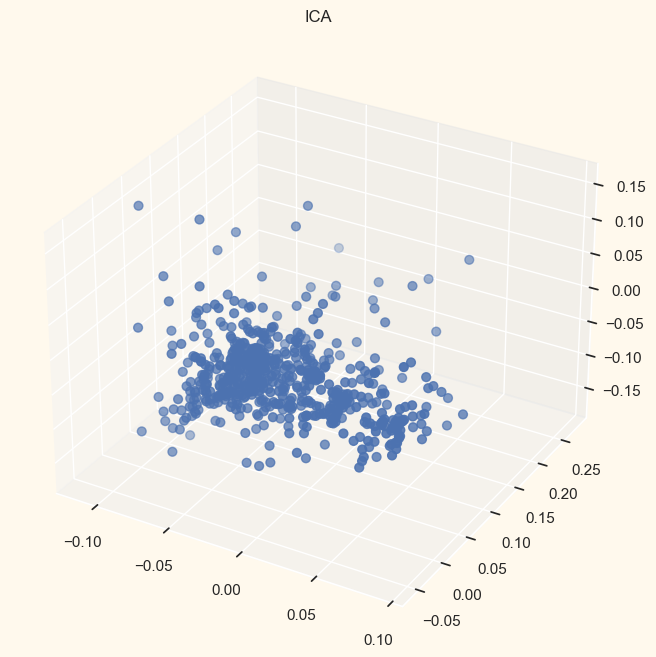

In [218]:
ICA = FastICA(n_components=3)

ica = ICA.fit_transform(X_scale)

X_ica = pd.DataFrame(ica, columns=(["col1","col2","col3"]))
x =X_ica["col1"]
y =X_ica["col2"]
z =X_ica["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("ICA")
plt.show()

<h2>K-means + ICA</h2>

Elbow Method to determine the number of clusters to be formed:


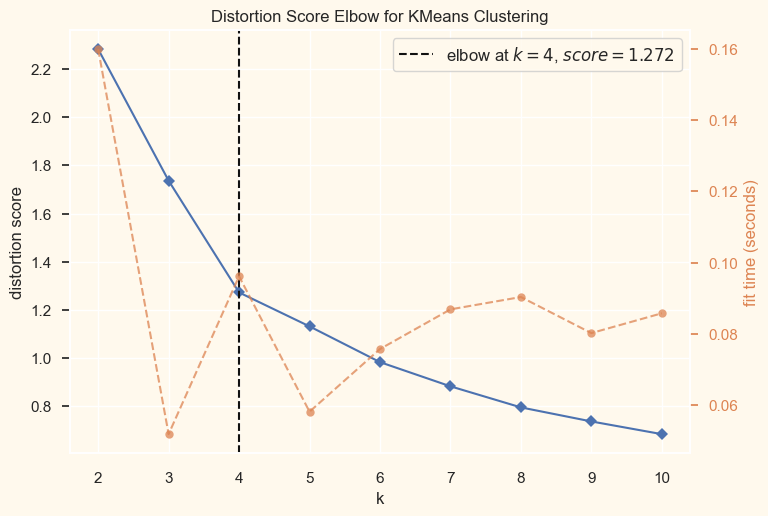

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [219]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_ica)
Elbow_M.show()

In [220]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_ica)

KMeans(n_clusters=4)

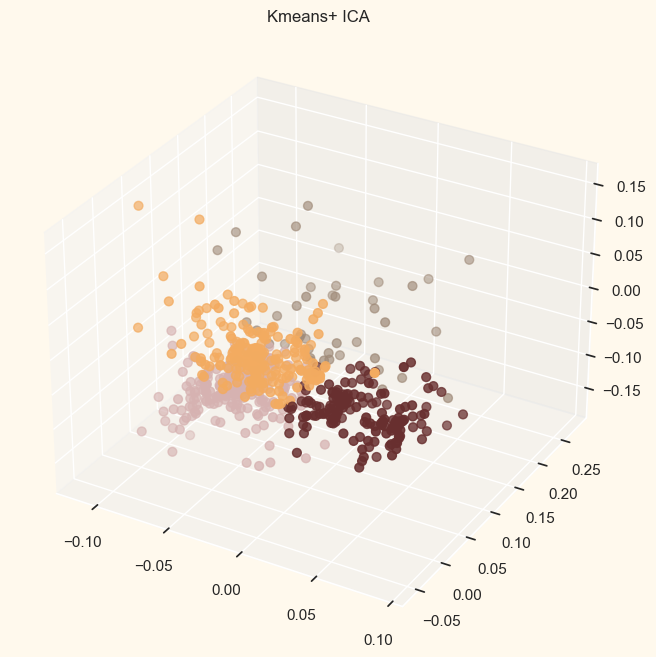

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

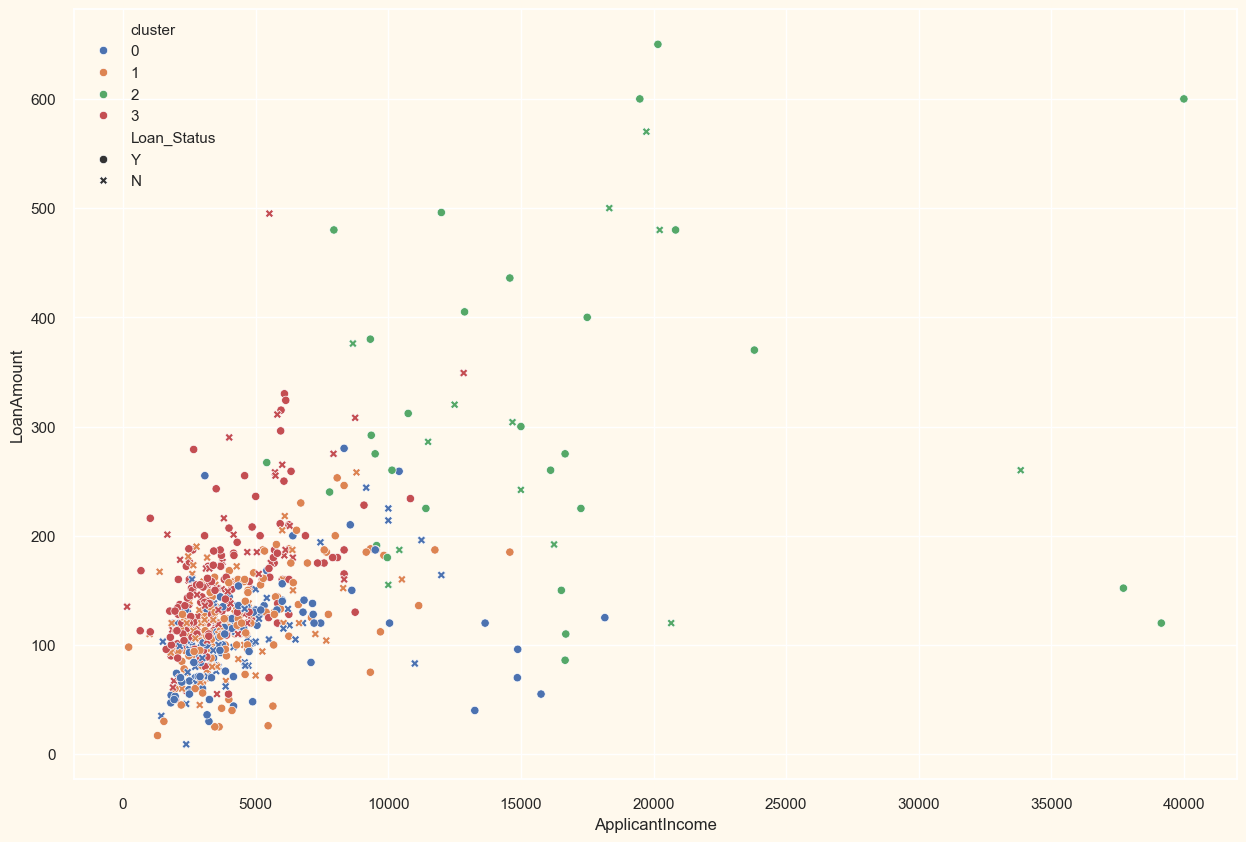

In [221]:
kmeans_result3 = X_ica.copy()
kmeans_clustered_tr3 = tr_cat.copy()

kmeans_result3['cluster'] = kmeans.labels_
kmeans_clustered_tr3['cluster'] = kmeans.labels_

x =kmeans_result3["col1"]
y =kmeans_result3["col2"]
z =kmeans_result3["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans_result3["cluster"], marker='o', cmap = cmap )
ax.set_title("Kmeans+ ICA")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=kmeans_clustered_tr3, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

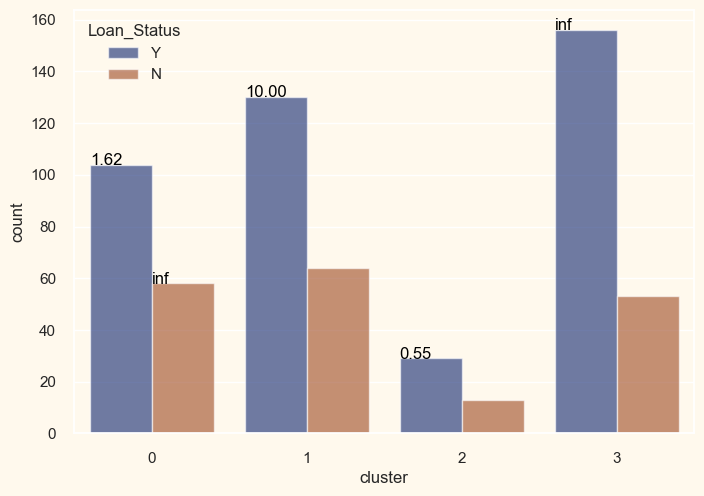

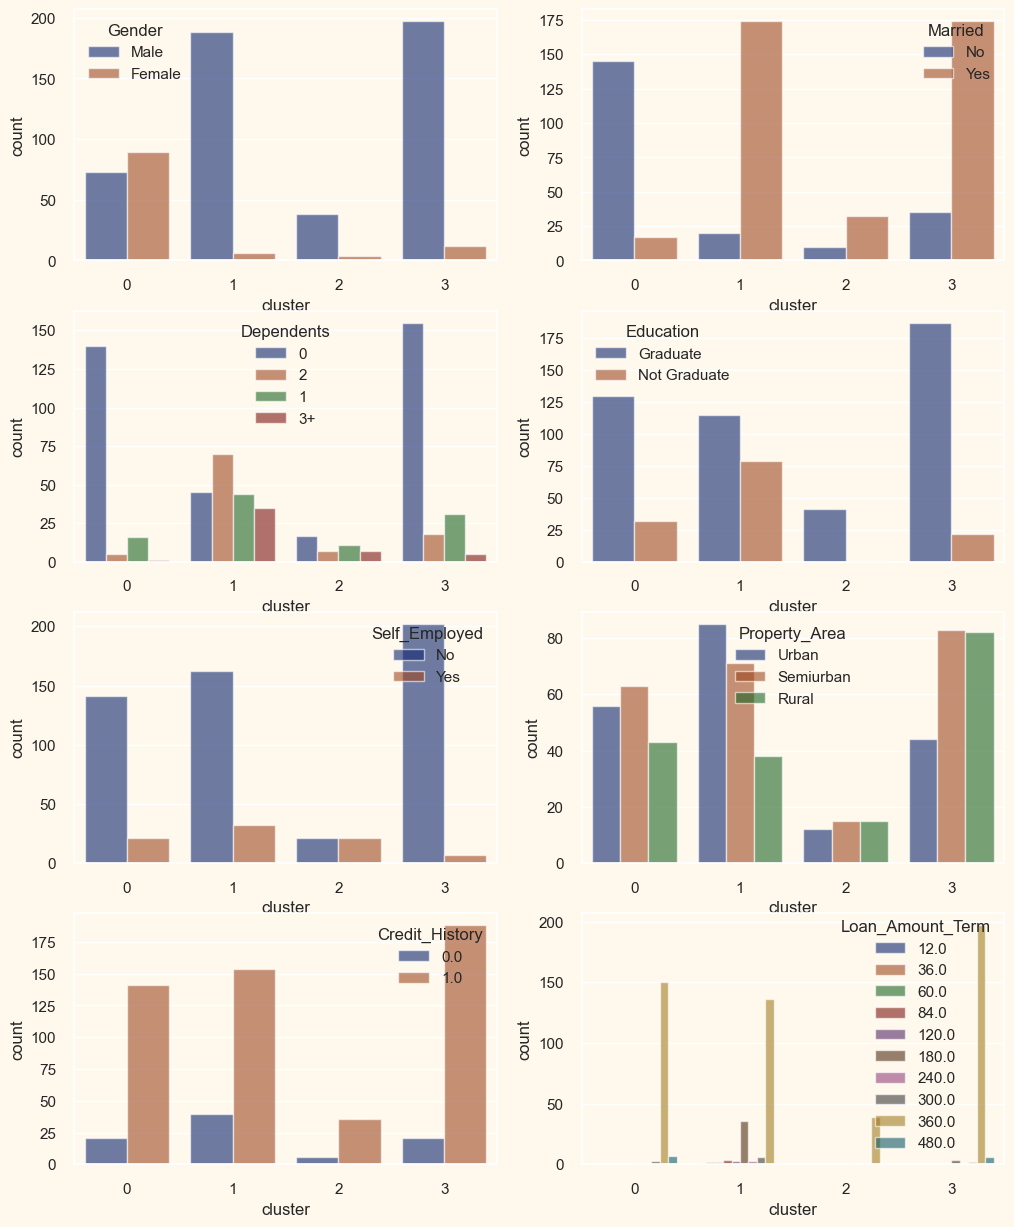

In [222]:
plotcluster2(kmeans_clustered_tr3)

</h2>GMM + ICA</h2>

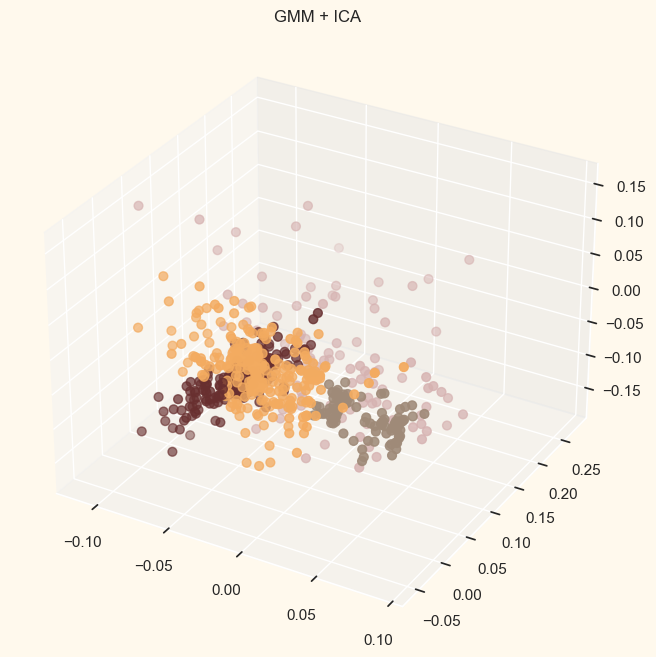

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

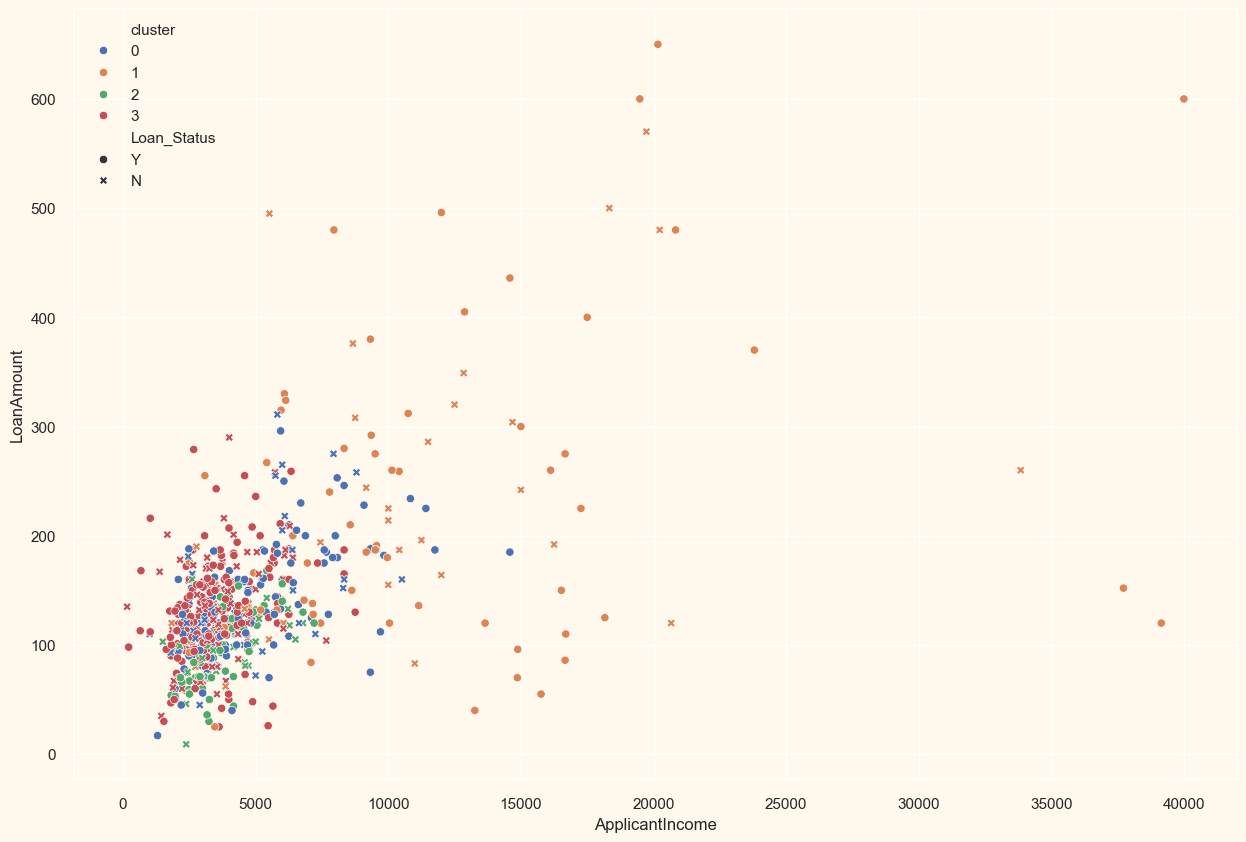

In [223]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_ica)
gmm_cluster = gmm.predict(X_ica)
gmm_result3 = X_ica.copy()
gmm_clustered_tr3 = tr_cat.copy()

gmm_result3['cluster'] = gmm_cluster
gmm_clustered_tr3['cluster'] = gmm_cluster

x =gmm_result3["col1"]
y =gmm_result3["col2"]
z =gmm_result3["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=gmm_result3["cluster"], marker='o', cmap = cmap )
ax.set_title("GMM + ICA")
plt.show()

fig = plt.figure(figsize=(15,10))
sns.scatterplot(data=gmm_clustered_tr3, x='ApplicantIncome', y='LoanAmount', hue='cluster',style='Loan_Status',palette = sns.color_palette())

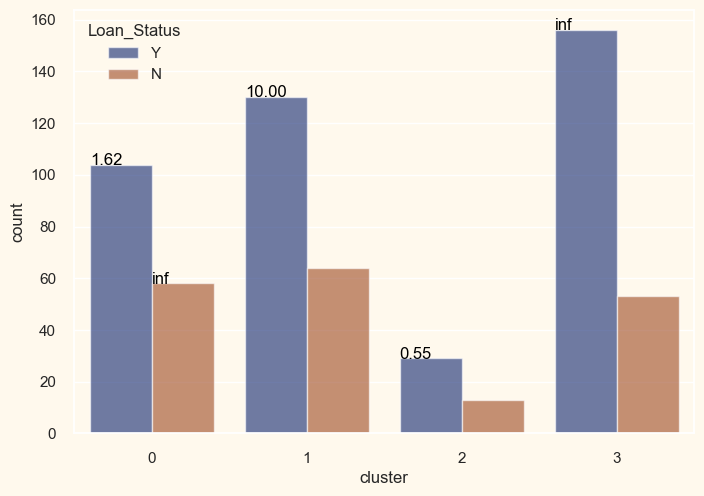

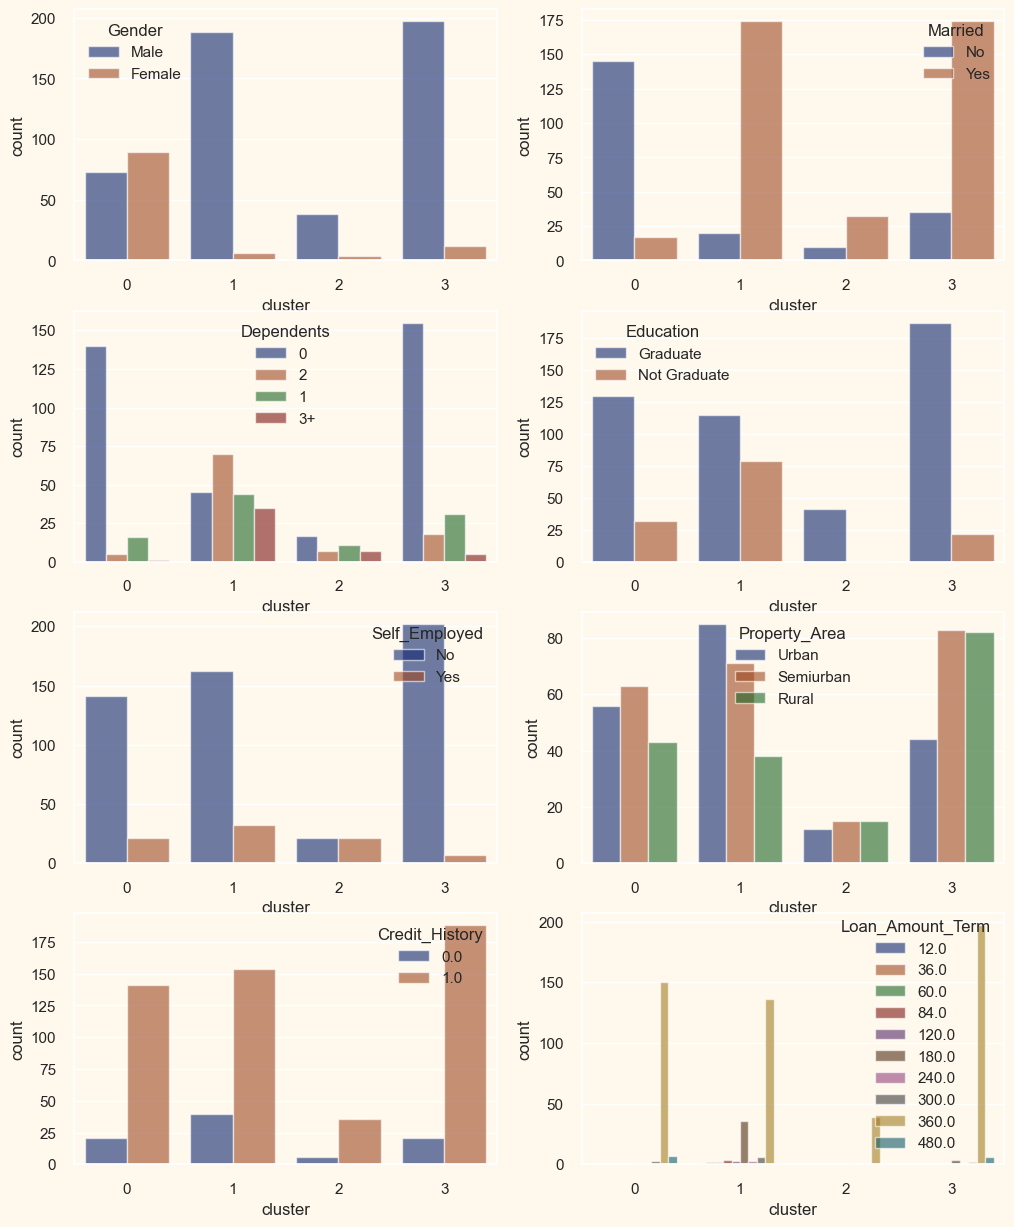

In [224]:
plotcluster2(kmeans_clustered_tr3)

<h1>Rerun Neural Network</h1>

In [225]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [226]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'identity', 'hidden_layer_sizes': (5, 5, 5), 'solver': 'adam'}


In [171]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(50,),activation='identity')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_MLP = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_ORIGIN=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.76      0.96      0.85        46

    accuracy                           0.74        61
   macro avg       0.55      0.51      0.48        61
weighted avg       0.65      0.74      0.67        61

73.77% Accurate


In [172]:
y = data['Loan_Status']
X = X_pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [173]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}


In [174]:
MLP_sum = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20, 20),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_PCA = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print("pca column",f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_PCA=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33        15
           1       0.78      0.78      0.78        46

    accuracy                           0.67        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.67      0.67      0.67        61

pca column 67.21% Accurate


In [175]:
X = kmeans_clustered_tr2['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [176]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_CLUSTER = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC = accuracy_score(y_predict,y_test)
print("cluster column",f"{round(MLP_SC*100,2)}% Accurate")
MLP_SC_CLUSTR=round(MLP_SC*100,2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.86        46

    accuracy                           0.75        61
   macro avg       0.38      0.50      0.43        61
weighted avg       0.57      0.75      0.65        61

cluster column 75.41% Accurate


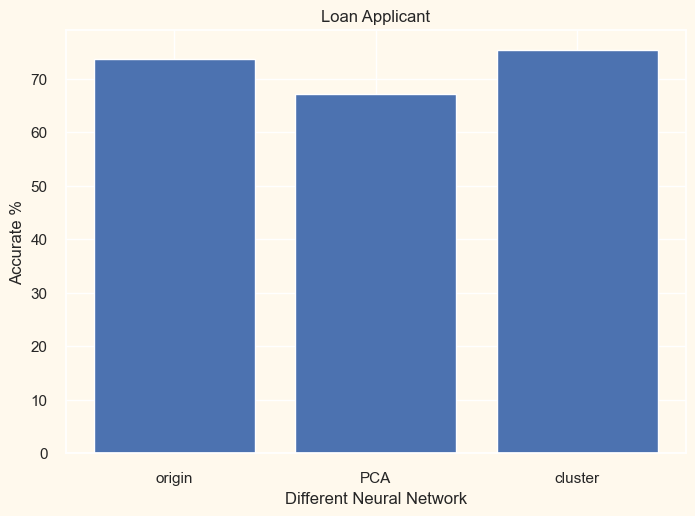

[73.77, 67.21, 75.41]


In [177]:
acc = [MLP_SC_ORIGIN, MLP_SC_PCA, MLP_SC_CLUSTR]
labels = ['origin', 'PCA', 'cluster']
plt.bar(range(len(acc)), acc, tick_label=labels)
plt.xlabel('Different Neural Network')
plt.ylabel('Accurate %')
plt.title('Loan Applicant')
plt.show()
print(acc)

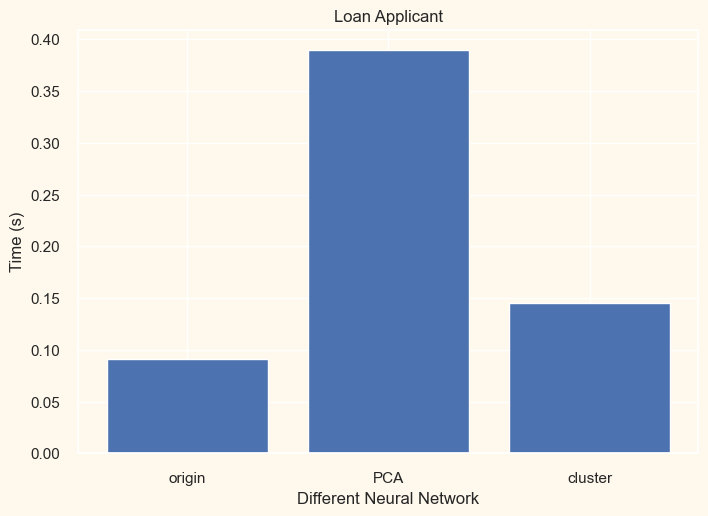

[0.09120392799377441, 0.3896617889404297, 0.14555811882019043]


In [178]:
time = [time_MLP, time_PCA, time_CLUSTER]
labels = ['origin', 'PCA', 'cluster']
plt.bar(range(len(time)), time, tick_label=labels)
plt.xlabel('Different Neural Network')
plt.ylabel('Time (s)')
plt.title('Loan Applicant')
plt.show()
print(time)